In [3]:
from google.colab import files
uploaded=files.upload()

Saving Tweets.csv to Tweets.csv


In [4]:
import pandas as pd
df=pd.read_csv("Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [6]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))
df['clean_text']=df['text']
df['clean_text']=df['clean_text'].str.lower()
df['clean_text']=df['clean_text'].apply(lambda x:re.sub(r'@\w+','',x))
df['clean_text']=df['clean_text']=df['clean_text'].apply(lambda x:re.sub(r'\s+',' ',x).strip())
df['clean_text']=df['clean_text']=df['clean_text'].apply(lambda x:' '.join([word for word in x.split()if word not in stop]))




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.1 MB/s eta 0:00:00


In [8]:
df['sentiment_score']=df['clean_text'].apply(lambda x:analyzer.polarity_scores(x)['compound'])

In [10]:
def categorize(score):
  if score>=0.05:
    return "Positive"
  elif score<=-0.05:
    return "Negative"
  else:
    return "Neutral"
df['sentiment']=df['sentiment_score'].apply(categorize)




In [11]:
df[['clean_text','sentiment_score','sentiment']].head(10)

,clean_text,sentiment_score,sentiment
0,said.,0.0000,Neutral
1,plus added commercials experience... tacky.,0.0000,Neutral
2,today... must mean need take another trip!,0.0000,Neutral
3,"really aggressive blast obnoxious ""entertainme...",-0.3306,Negative
4,really big bad thing,-0.5829,Negative
5,seriously would pay $30 flight seats playing. ...,-0.6240,Negative
6,"yes, nearly every time fly vx “ear worm” won’t...",0.6908,Positive
7,really missed prime opportunity men without ha...,0.1458,Positive
8,"well, didn't…but do! :-d",-0.2249,Negative
9,"amazing, arrived hour early. good me.",0.7717,Positive


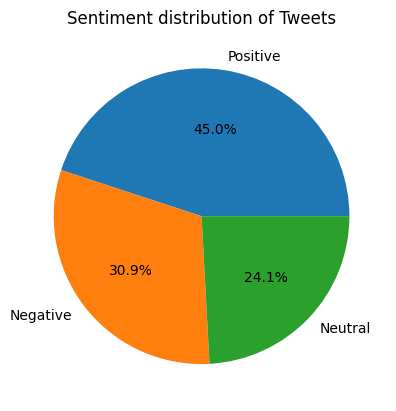

In [21]:
import matplotlib.pyplot as plt
df['sentiment'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Sentiment distribution of Tweets")
plt.ylabel("")
plt.show()